## Import

In [1]:
import pandas as pd
import numpy as np
import scipy

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# deep learning
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from matplotlib import pyplot as plt

%matplotlib inline

## Load Data

In [2]:
path = './data_1/banknote_authentication.csv'

In [3]:
df = pd.read_csv(path, header = None)
df.sample(5)

,0,1,2,3,4
876,-3.5916,-6.22850,10.2389,-1.15430,1
54,4.9264,5.49600,-2.4774,-0.50648,0
318,1.5799,-4.70760,7.9186,-1.54870,0
1254,-3.8894,-7.83220,9.8208,0.47498,1
883,-3.3604,-0.32696,2.1324,0.60170,1


## Describer statistic

In [4]:
df.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
df.corr()

,0,1,2,3,4
0,1.000000,0.264026,-0.380850,0.276817,-0.724843
1,0.264026,1.000000,-0.786895,-0.526321,-0.444688
2,-0.380850,-0.786895,1.000000,0.318841,0.155883
3,0.276817,-0.526321,0.318841,1.000000,-0.023424
4,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1372 non-null   float64
 1   1       1372 non-null   float64
 2   2       1372 non-null   float64
 3   3       1372 non-null   float64
 4   4       1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df[4].value_counts()

0    762
1    610
Name: 4, dtype: int64

In [8]:
# DS is balanced

In [9]:
## Create sample

In [10]:
X, y = df.values[:, :-1], df.values[:, -1]

In [11]:
X = X.astype('float32') # Check float value

In [12]:
X[1]

array([ 4.5459,  8.1674, -2.4586, -1.4621], dtype=float32)

In [13]:
y[1]

0.0

In [14]:
# LabelEncoder for y
y = LabelEncoder().fit_transform(y)

## Train Test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 4)
(343, 4)
(1029,)
(343,)


## Neural Network Input

In [17]:
n_futures = X.shape[1] # Size X

In [18]:
# Create a model
model = Sequential()

# Add input layer
model.add(Dense(20, activation='relu', input_shape = (n_futures,) ))
# Add layer
model.add(Dense(10, activation='relu'))

# output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy') # for binary classification

In [19]:
# Train our model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=50,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/20
21/21 [==============================] - 1s 10ms/step - loss: 0.6299 - val_loss: 0.5317
Epoch 2/20
21/21 [==============================] - 0s 3ms/step - loss: 0.4935 - val_loss: 0.4298
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 0.3971 - val_loss: 0.3455
Epoch 4/20
21/21 [==============================] - 0s 5ms/step - loss: 0.3168 - val_loss: 0.2740
Epoch 5/20
21/21 [==============================] - 0s 4ms/step - loss: 0.2513 - val_loss: 0.2165
Epoch 6/20
21/21 [==============================] - 0s 4ms/step - loss: 0.1989 - val_loss: 0.1712
Epoch 7/20
21/21 [==============================] - 0s 2ms/step - loss: 0.1590 - val_loss: 0.1353
Epoch 8/20
21/21 [==============================] - 0s 3ms/step - loss: 0.1274 - val_loss: 0.1076
Epoch 9/20
21/21 [==============================] - 0s 3ms/step - loss: 0.1035 - val_loss: 0.0859
Epoch 10/20
21/21 [==============================] - 0s 3ms/step - loss: 0.0844 - val_loss: 0.0699
Epoch 11/20
21/21 

In [20]:
# predict test_set
# yhat = model.predict(X_test)
# yhat = model.predict_classes(X_test)
yhat=(model.predict(X_test)>0.5).astype("int32")
# yhat = np.argmax(model.predict(X_test), axis=-1)

In [21]:
# y_test = y_test.astype('float32')
# y_test

Accuracy:  1.0


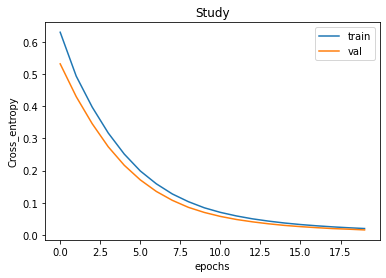

In [22]:
#Validation our predict
score = accuracy_score(y_test, yhat)
print('Accuracy: ', score)

#Visualizing the procces of training
plt.title('Study')
plt.xlabel('epochs')
plt.ylabel('Cross_entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')

plt.legend()
plt.show()

### Cross validation

In [23]:
# K Fold
kfold = StratifiedKFold(10)

In [24]:
# metrics array
scores = []

Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.7710 - val_loss: 0.5148
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4249 - val_loss: 0.3194
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2847 - val_loss: 0.2120
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1895 - val_loss: 0.1414
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1293 - val_loss: 0.1024
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0948 - val_loss: 0.0780
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0728 - val_loss: 0.0615
Epoch 8/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0578 - val_loss: 0.0503
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0462 - val_loss: 0.0411
Epoch 10/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.0341
Epoch 11/20
39/39 [

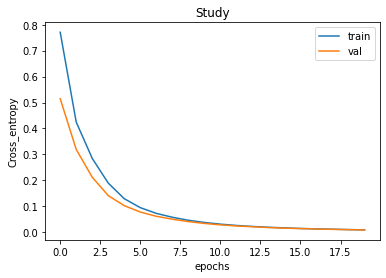

Epoch 1/20
39/39 [==============================] - 1s 5ms/step - loss: 0.5582 - val_loss: 0.4474
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4187 - val_loss: 0.3586
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3408 - val_loss: 0.2892
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2749 - val_loss: 0.2243
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2110 - val_loss: 0.1652
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1559 - val_loss: 0.1092
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1025 - val_loss: 0.0710
Epoch 8/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0730 - val_loss: 0.0484
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0548 - val_loss: 0.0353
Epoch 10/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0427 - val_loss: 0.0259
Epoch 11/20
39/39 [

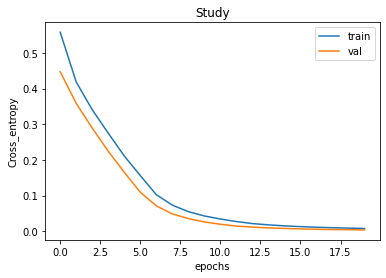

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.3728 - val_loss: 0.2986
Epoch 2/20
39/39 [==============================] - 0s 3ms/step - loss: 0.2079 - val_loss: 0.2028
Epoch 3/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1252 - val_loss: 0.1465
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0829 - val_loss: 0.1097
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0586 - val_loss: 0.0849
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0435 - val_loss: 0.0684
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0333 - val_loss: 0.0563
Epoch 8/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0265 - val_loss: 0.0479
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.0388
Epoch 10/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0180 - val_loss: 0.0345
Epoch 11/20
39/39 [

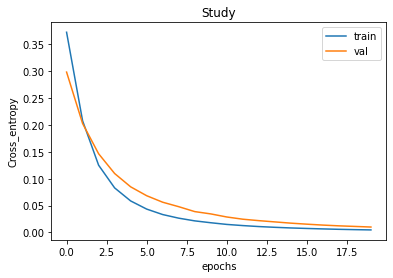

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.8259 - val_loss: 0.6107
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.5183 - val_loss: 0.4145
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3287 - val_loss: 0.2553
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2069 - val_loss: 0.1610
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1373 - val_loss: 0.1112
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0996 - val_loss: 0.0810
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0748 - val_loss: 0.0610
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0585 - val_loss: 0.0473
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0472 - val_loss: 0.0383
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0392 - val_loss: 0.0315
Epoch 11/20
39/39 [

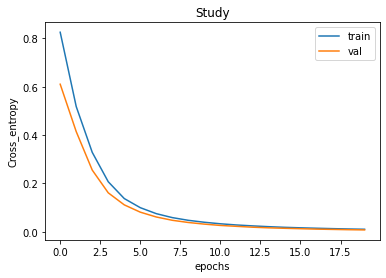

Epoch 1/20
39/39 [==============================] - 1s 11ms/step - loss: 0.5553 - val_loss: 0.4701
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3833 - val_loss: 0.3073
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2130 - val_loss: 0.1851
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1312 - val_loss: 0.1390
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0965 - val_loss: 0.1107
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0746 - val_loss: 0.0943
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0589 - val_loss: 0.0787
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0476 - val_loss: 0.0639
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0389 - val_loss: 0.0552
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.0472
Epoch 11/20
39/39 

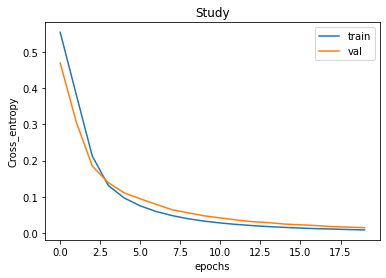

Epoch 1/20
39/39 [==============================] - 0s 4ms/step - loss: 0.6420 - val_loss: 0.3969
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3211 - val_loss: 0.2391
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1995 - val_loss: 0.1567
Epoch 4/20
39/39 [==============================] - 0s 4ms/step - loss: 0.1300 - val_loss: 0.1089
Epoch 5/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0904 - val_loss: 0.0788
Epoch 6/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0660 - val_loss: 0.0585
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0495 - val_loss: 0.0457
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0381 - val_loss: 0.0369
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.0296
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0242 - val_loss: 0.0247
Epoch 11/20
39/39 [

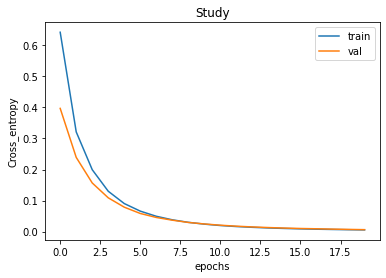

Epoch 1/20
39/39 [==============================] - 1s 5ms/step - loss: 0.6794 - val_loss: 0.5256
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4835 - val_loss: 0.3520
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3358 - val_loss: 0.2207
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2232 - val_loss: 0.1361
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1493 - val_loss: 0.0853
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1031 - val_loss: 0.0565
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0742 - val_loss: 0.0380
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0551 - val_loss: 0.0263
Epoch 9/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0408 - val_loss: 0.0189
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0312 - val_loss: 0.0145
Epoch 11/20
39/39 [

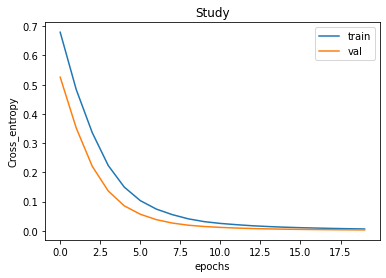

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.6667 - val_loss: 0.4543
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4024 - val_loss: 0.3168
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2966 - val_loss: 0.2223
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2160 - val_loss: 0.1456
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1508 - val_loss: 0.0928
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1067 - val_loss: 0.0608
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0786 - val_loss: 0.0414
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0596 - val_loss: 0.0296
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0461 - val_loss: 0.0215
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0364 - val_loss: 0.0165
Epoch 11/20
39/39 [

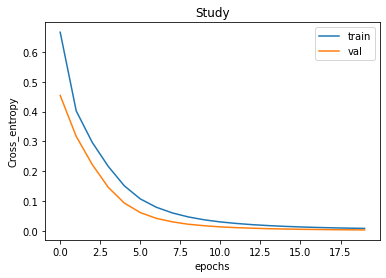

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.6935 - val_loss: 0.5471
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4508 - val_loss: 0.3792
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3077 - val_loss: 0.2273
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1919 - val_loss: 0.1465
Epoch 5/20
39/39 [==============================] - 0s 3ms/step - loss: 0.1281 - val_loss: 0.0931
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0886 - val_loss: 0.0601
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0671 - val_loss: 0.0469
Epoch 8/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0528 - val_loss: 0.0347
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0424 - val_loss: 0.0278
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0346 - val_loss: 0.0211
Epoch 11/20
39/39 [

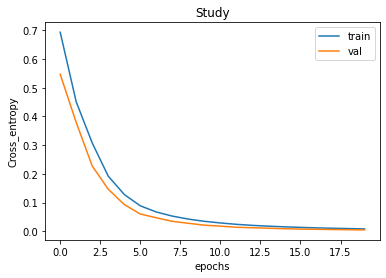

Epoch 1/20
39/39 [==============================] - 1s 4ms/step - loss: 0.7265 - val_loss: 0.5364
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3598 - val_loss: 0.2762
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1952 - val_loss: 0.1745
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1238 - val_loss: 0.1256
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0872 - val_loss: 0.0945
Epoch 6/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0655 - val_loss: 0.0747
Epoch 7/20
39/39 [==============================] - 0s 4ms/step - loss: 0.0510 - val_loss: 0.0605
Epoch 8/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0401 - val_loss: 0.0501
Epoch 9/20
39/39 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.0414
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.0265 - val_loss: 0.0351
Epoch 11/20
39/39 [

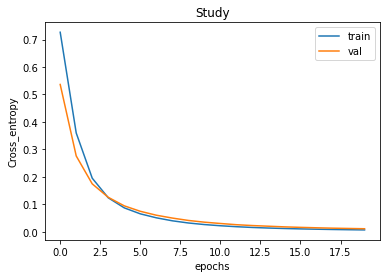

Cross validation mean accuracy:  0.8795461758172008


In [28]:
for train_ix, test_ix in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix]
    n_futures = X.shape[1] # Size X

    # Create a model
    model = Sequential()
    # Add input layer
    model.add(Dense(20, activation='relu', input_shape = (n_futures,) ))
    # Add layer
    model.add(Dense(10, activation='relu'))
    # output layer
    model.add(Dense(1, activation='sigmoid'))
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy') # for binary classification
    
    # Train our model
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=32,
                        verbose=1,
                        validation_data=(X_test, y_test))
    
    # predict test_set
    yhat=(model.predict(X_test)>0.5).astype("int32")
    
    #Validation our predict
    score = accuracy_score(y_test, yhat)
    print('Accuracy: ', score)
    
    #Visualizing the procces of training
    plt.title('Study')
    plt.xlabel('epochs')
    plt.ylabel('Cross_entropy')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')

    plt.legend()
    plt.show()
    
    scores.append(score)
    
print('Cross validation mean accuracy: ', np.mean(scores))